# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data=pd.read_csv(r'Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [5]:
continent=data['continent'].unique()
continent


array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [7]:
data_mapped=data.copy()
data_mapped['continent']=data_mapped['continent'].map({'North America':0, 'Asia':1, 'Africa':2, 'Europe':3, 'South America':4,'Oceania':5, 'Antarctica':6, 'Seven seas (open ocean)':7})
data_mapped['continent'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [8]:
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [10]:
x=data_mapped.iloc[:,3:4]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,5
237,1
238,2
239,2


## Clustering

Use 4 clusters initially.

In [11]:
kmeans=KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [12]:
identified_clusters=kmeans.predict(x)
identified_clusters

array([1, 1, 3, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 3, 0, 3, 3,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3,
       3, 3, 2, 0, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 0, 1, 3, 0, 3, 3,
       0, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 1, 0, 3, 3, 3, 3, 3, 0, 1, 1, 1,
       2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 3, 1, 1, 2, 1, 1, 0, 1, 1, 1, 3, 3, 1, 0, 1, 3, 0, 0, 0,
       1, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 0, 1, 0, 1, 2, 3, 3, 1, 2, 3, 1,
       3, 2, 3, 2, 3, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 0, 0, 1, 2, 1, 0, 0, 3, 3, 1, 3, 3, 3, 1, 2, 2, 2, 3, 1, 0, 3,
       3, 1, 0, 3, 0, 0, 0, 0, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 3,
       1, 1, 3, 3, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 3, 3, 3])

In [13]:
data_with_cluster=data.copy()
data_with_cluster['Cluster']=identified_clusters
data_with_cluster

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,North America,1
1,Afghanistan,66.004734,33.835231,Asia,1
2,Angola,17.537368,-12.293361,Africa,3
3,Anguilla,-63.064989,18.223959,North America,1
4,Albania,20.049834,41.142450,Europe,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,2
237,Yemen,47.586762,15.909280,Asia,1
238,South Africa,25.083901,-29.000341,Africa,3
239,Zambia,27.774759,-13.458242,Africa,3


## Plot the data

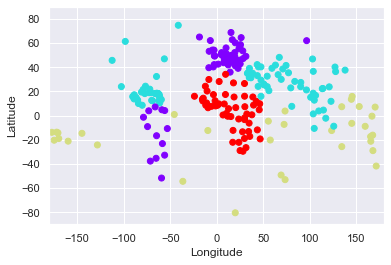

In [14]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c=data_with_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.